## Clustering MCF7 cell-line feature data | Ascertaining Key Variables for the Hubs and Non-Hubs

#### Author: Shaurya Jauhari
#### Last Reviewed: December 31st, 2020

### Background

<p align = "justify"> This workflow is premised on the idea that with the clustering of the data on read-coverages (for the features), we'll be able to figure out the key variables that are truly representative of the Hubs or Non-Hubs, as defined by our previous analyses. </p>
<p align = "justify"> So, we began with a data matrix that held information about the reads associated with histone marks and protein-bindings, corresponding to our bin-intervals of 2Kb (genome-wide). From an initial analysis, we were able to classifiy such intervals as "Hubs" or "Non-Hubs". <i> Hubs </i> are those regions that interact at a distance of 1Mb or "Inf", as per the definitions in <a href= "https://doi.org/10.1093/database/baz162" >GREG</a>. </p> 

In [1]:
# --- Loading Data --- #
# --- From Logistic Regression --- #

classData <- read.table("./truePositives/mcf7LR.txt", header = T)
featureData <- read.table("../../transcriptionFactoriesGREG/MachineLearning//data/MCF7forML.txt", header = T)

# --- Removing Redundancy --- #

classDataUnique <- unique(classData)
featureDataUnique <- unique(featureData)

# --- Merging Data --- #

if(!require(dplyr)) install.packages(dplyr,
                                         repos = "https://mirrors.tuna.tsinghua.edu.cn/CRAN/",
                                         dependencies = TRUE)
suppressPackageStartupMessages(library(dplyr))
one <- inner_join(classDataUnique, featureDataUnique, by = c("chr", "start", "end"))

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
str(one) # let's examine the structure of data

'data.frame':	1211409 obs. of  18 variables:
 $ chr       : Factor w/ 25 levels "chr1","chr10",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ start     : int  1 2001 4001 6001 8001 10001 12001 14001 16001 18001 ...
 $ end       : int  2000 4000 6000 8000 10000 12000 14000 16000 18000 20000 ...
 $ Class.x   : Factor w/ 2 levels "Hub","Non-Hub": 2 2 2 2 2 2 2 2 2 2 ...
 $ Prediction: Factor w/ 2 levels "Hub","Non-Hub": 2 2 2 2 2 2 2 2 2 2 ...
 $ CTCF      : num  0 0 0 0 0 ...
 $ EP300     : num  0 0 0 0 0 ...
 $ H3K27me3  : num  0 0 0 0 0 ...
 $ H3K36me3  : num  0 0 0 0 0 ...
 $ H3K4me1   : num  0 0 0 0 0 ...
 $ H3K4me2   : num  0 0 0 0 0 ...
 $ H3K4me3   : num  0 0 0 0 0 ...
 $ H3K9ac    : num  0 0 0 0 0 ...
 $ H3K9me3   : num  0 0 0 0 0 ...
 $ RAD21     : num  0 0 0 0 0 ...
 $ RNA.Seq   : num  0 0 0 0 0 ...
 $ RNAPol2   : num  0 0 0 0 0 ...
 $ Class.y   : Factor w/ 2 levels "Hub","Non-Hub": 2 2 2 2 2 2 2 2 2 2 ...


In [3]:
# --- Applying Hierarchical Clustering --- #

distance <- dist(one[, - c(1:5, 18)], method = "euclidean")
cluster <- hclust(distance, method = "average")
plot(cluster, hang = -1, label = one$Prediction)

ERROR: Error: cannot allocate vector of size 5466.9 Gb


The hierarchical clustering is sensitive to the extent of data, and didn't execute successfully. Let us try a different flavor; k-means clustering. But before that, let's look at the distribution of variables which holds clue to nature of different classes.

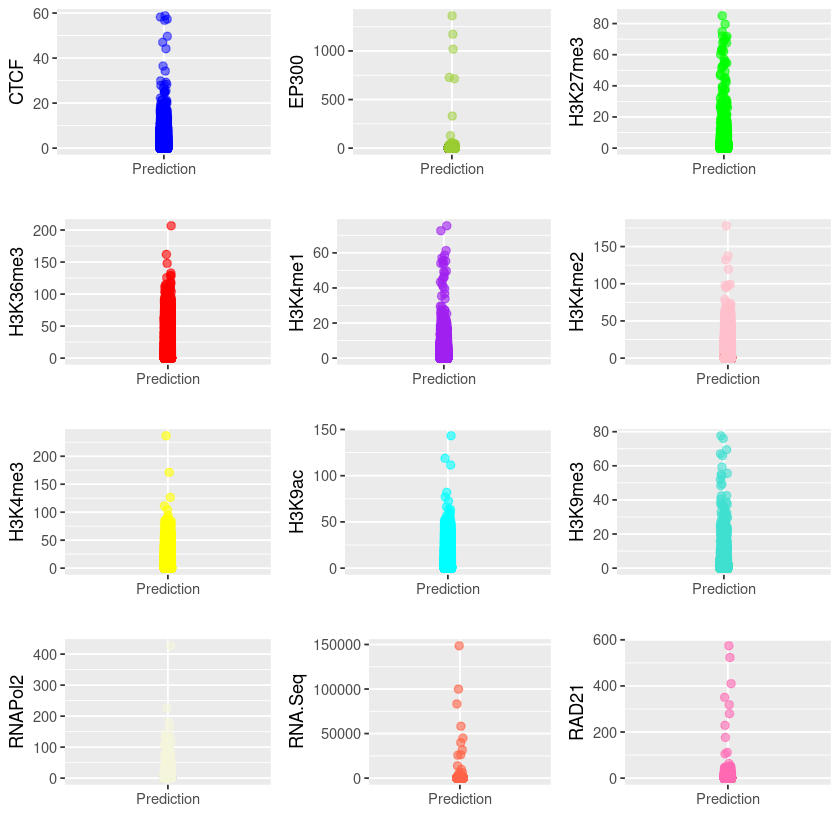

In [4]:
# --- K-Means Clustering --- #

requiredPackages <- c("tidyverse", "gridExtra")
newPackages <- requiredPackages[!(requiredPackages %in% installed.packages()[,"Package"])]
if(length(newPackages)) install.packages(newPackages,
                                         repos = "https://mirrors.tuna.tsinghua.edu.cn/CRAN/",
                                         dependencies = TRUE)
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(gridExtra))

# --- Distribution of each variable --- #

plot1 <- one %>% 
  ggplot(aes(x = "Prediction", y = CTCF)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .5, color = "blue") +
  labs(x = "", y="CTCF")

plot2 <- one %>% 
  ggplot(aes(x = "Prediction", y = EP300)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .5, color = "yellowgreen") +
  labs(x = "", y="EP300")

plot3 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K27me3)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "green") +
  labs(x = "", y="H3K27me3")

plot4 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K36me3)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "red") +
  labs(x = "", y="H3K36me3")

plot5 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K4me1)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "purple") +
  labs(x = "", y="H3K4me1")

plot6 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K4me2)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "pink") +
  labs(x = "", y="H3K4me2")

plot7 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K4me3)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "yellow") +
  labs(x = "", y="H3K4me3")

plot8 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K9ac)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "cyan") +
  labs(x = "", y="H3K9ac")

plot9 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K9me3)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "turquoise") +
  labs(x = "", y="H3K9me3")

plot10 <-  one %>%
  ggplot(aes(x = "Prediction", y = RNAPol2)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "beige") +
  labs(x = "", y="RNAPol2")

plot11 <-  one %>%
  ggplot(aes(x = "Prediction", y = RNA.Seq)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "tomato") +
  labs(x = "", y="RNA.Seq")

plot12 <-  one %>%
  ggplot(aes(x = "Prediction", y = RAD21)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "hotpink") +
  labs(x = "", y="RAD21")


grid.arrange(plot1, plot2, plot3, plot4, plot5, plot6, plot7, plot8, plot9, plot10, plot11, plot12)

We can reflect that the variables are quite assymetrical to each others in terms of their values.  

In [5]:
summary(one)

      chr             start                end               Class.x       
 chr1   :114084   Min.   :        1   Min.   :     2000   Hub    :   2270  
 chr2   : 96646   1st Qu.: 42246001   1st Qu.: 42248000   Non-Hub:1209139  
 chr4   : 87801   Median : 82098001   Median : 82100000                    
 chr3   : 78759   Mean   : 87689894   Mean   : 87691893                    
 chrX   : 74857   3rd Qu.:125368001   3rd Qu.:125370000                    
 chr5   : 66620   Max.   :249248937   Max.   :249250621                    
 (Other):692642                                                            
   Prediction           CTCF             EP300              H3K27me3      
 Hub    :   2270   Min.   : 0.0000   Min.   :   0.0000   Min.   : 0.0000  
 Non-Hub:1209139   1st Qu.: 0.2003   1st Qu.:   0.0000   1st Qu.: 0.0000  
                   Median : 0.4005   Median :   0.2809   Median : 0.0000  
                   Mean   : 0.5004   Mean   :   0.4082   Mean   : 0.2796  
                 

Now, let us execute the k-means clustering algorithm with an abitrary value of 3 for <i> k </i>. It is known to us that there are just two classes that exist.

In [6]:
kmeans3 <- kmeans(one[, - c(1:5, 18)], centers = 3, nstart = 20)
cat("The within cluster sum of squares for this clustering is", (kmeans3$betweenss/kmeans3$totss)*100, "%")

The within cluster sum of squares for this clustering is 92.58556 %

The within cluster sum of squares is an important metric. It helps us determine how compact the clusters are, as in how similar are the elements of a cluster. The higher this percentage, the "cleaner" the clustering. It's quite high for 3 clusters, as we observe.

In [7]:
kmeans2 <- kmeans(one[, - c(1:5, 18)], centers = 2, nstart = 20)
cat("The within cluster sum of squares for this clustering is", (kmeans2$betweenss/kmeans2$totss)*100, "%")

The within cluster sum of squares for this clustering is 77.77102 %

Now the percentage has gone down to ~ 78 %. This run hasn't been any better.

<p align = "justify"> Understandably, it would be tedious to check for multiple values of <i> centers </i>, and we'll stick to the best estimate of 3 for now. Contrarily, we can explore another package, <a href = "https://github.com/o1iv3r/FeatureImpCluster" > FeatureImpCluster</a>, for eliciting the importance of variables. </p>

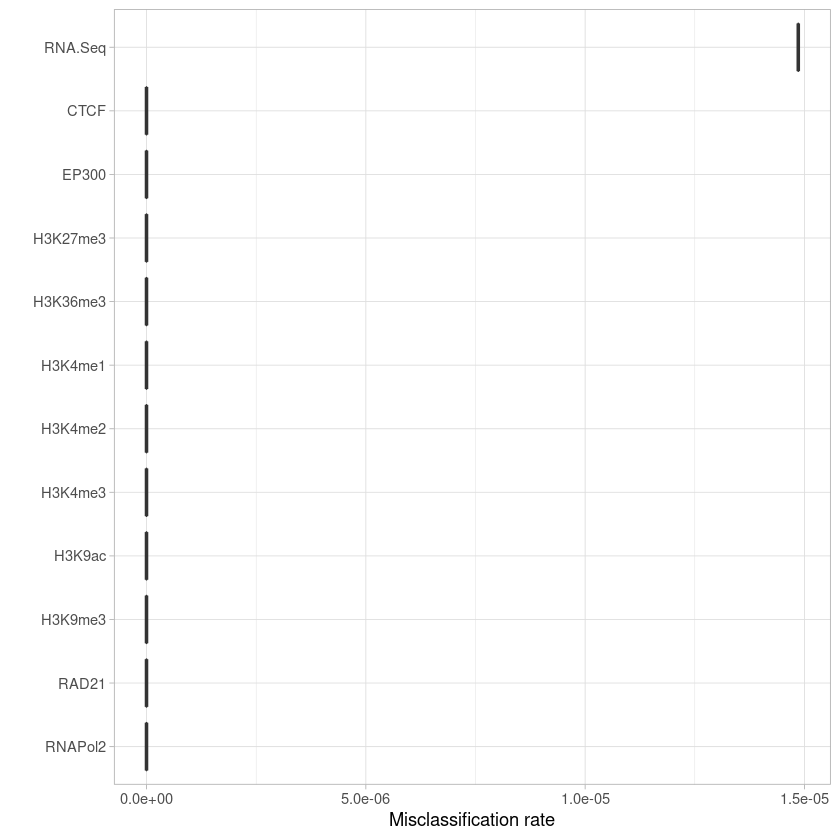

In [12]:
# --- Installing supporting package --- # 

if(!require(flexclust)) install.packages("flexclust",
                                         repos = "https://mirrors.tuna.tsinghua.edu.cn/CRAN/",
                                         dependencies = TRUE)

suppressPackageStartupMessages(library(flexclust))
suppressPackageStartupMessages(library(FeatureImpCluster))

# --- Running Algorithm --- #

set.seed(10)
res <- kcca(one[, -c(1:5, 18)], k = 3)
resultFeatureImp <- FeatureImpCluster(res, as.data.table(one[, -c(1:5, 18)]))
plot(resultFeatureImp, color= "none")

<p align = "justify"> What <i> FeatureImpCluster </i> helps us determine is the variable importance, via computation of the <i> permutation misclassification rate </i>. This metric for a variable is <b> the number of wrong cluster assignments divided by the number of observations (rows) given a permutation of the feature </b>. The mean misclassification rate over all iterations is interpreted as variable importance. </p>

In [13]:
PermMisClassRate(res, as.data.table(one[, - c(1:5, 18)]), varName = "RNA.Seq")

[1] 1.485873e-05 1.485873e-05 1.485873e-05 1.485873e-05 1.485873e-05

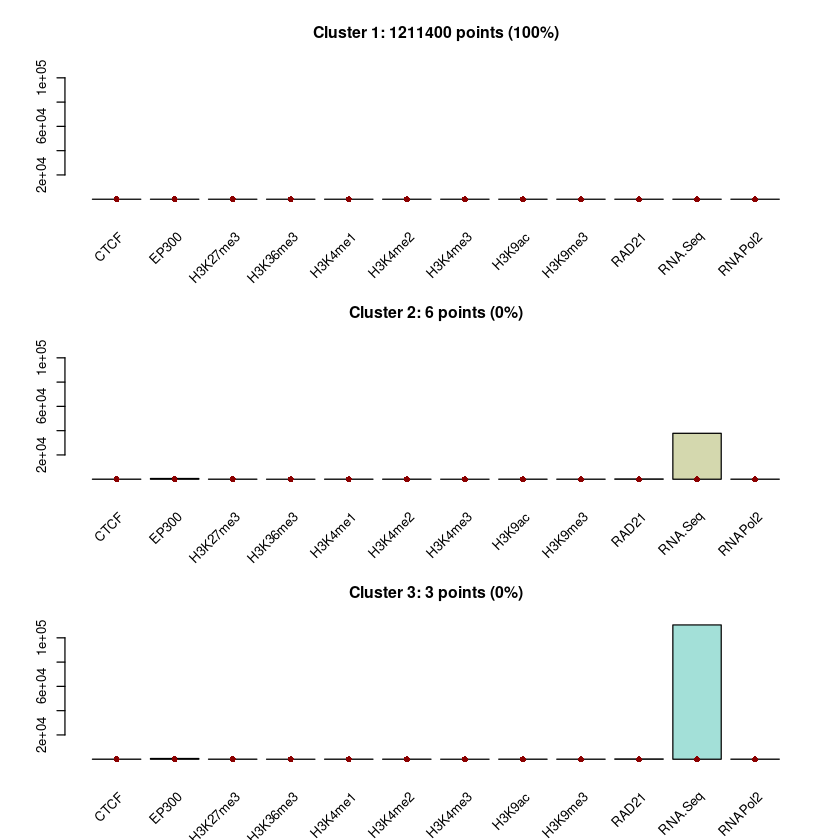

In [14]:
barplot(res)

<p align= "justify"> We can just see peaks for RNA.Seq, and nothing else is much apparent.</p>

### Verifying with the true positives from Random Forests

In [15]:
classDataRF <- read.table("./truePositives/mcf7RF.txt", header = T)
classDataUniqueRF <- unique(classDataRF)

two <- inner_join(classDataUniqueRF, featureDataUnique, by = c("chr", "start", "end"))

In [16]:
str(two)

'data.frame':	1510248 obs. of  18 variables:
 $ chr       : Factor w/ 25 levels "chr1","chr10",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ start     : int  1 2001 4001 6001 8001 10001 12001 14001 16001 18001 ...
 $ end       : int  2000 4000 6000 8000 10000 12000 14000 16000 18000 20000 ...
 $ Class.x   : Factor w/ 2 levels "Hub","Non-Hub": 2 2 2 2 2 2 2 2 2 2 ...
 $ Prediction: Factor w/ 2 levels "Hub","Non-Hub": 2 2 2 2 2 2 2 2 2 2 ...
 $ CTCF      : num  0 0 0 0 0 ...
 $ EP300     : num  0 0 0 0 0 ...
 $ H3K27me3  : num  0 0 0 0 0 ...
 $ H3K36me3  : num  0 0 0 0 0 ...
 $ H3K4me1   : num  0 0 0 0 0 ...
 $ H3K4me2   : num  0 0 0 0 0 ...
 $ H3K4me3   : num  0 0 0 0 0 ...
 $ H3K9ac    : num  0 0 0 0 0 ...
 $ H3K9me3   : num  0 0 0 0 0 ...
 $ RAD21     : num  0 0 0 0 0 ...
 $ RNA.Seq   : num  0 0 0 0 0 ...
 $ RNAPol2   : num  0 0 0 0 0 ...
 $ Class.y   : Factor w/ 2 levels "Hub","Non-Hub": 2 2 2 2 2 2 2 2 2 2 ...


As before, we'll consider some arbitrary number of cluster and check for the magnitude of within-cluster sum of squares. The one with the highest shall be chosen subsequently for further analysis. 

In [17]:
kmeans3_1 <- kmeans(two[, - c(1:5, 18)], centers = 3, nstart = 20, iter.max = 20) 
# increasing the value of iter.max from 10 (default) to 20, for dealing with convergence issues in the model.

cat("The within cluster sum of squares for this clustering is", (kmeans3_1$betweenss/kmeans3_1$totss)*100, "%")

The within cluster sum of squares for this clustering is 92.57489 %

In [18]:
kmeans2_1 <- kmeans(two[, - c(1:5, 18)], centers = 2, nstart = 20)
cat("The within cluster sum of squares for this clustering is", (kmeans2_1$betweenss/kmeans2_1$totss)*100, "%")

The within cluster sum of squares for this clustering is 77.76206 %

In [19]:
kmeans4 <- kmeans(two[, - c(1:5, 18)], centers = 4, nstart = 20, iter.max = 40)
cat("The within cluster sum of squares for this clustering is", (kmeans4$betweenss/kmeans4$totss)*100, "%")

The within cluster sum of squares for this clustering is 92.6435 %

In [20]:
kmeans5 <- kmeans(two[, - c(1:5, 18)], centers = 5, nstart = 20, iter.max = 50)
cat("The within cluster sum of squares for this clustering is", (kmeans5$betweenss/kmeans5$totss)*100, "%")

The within cluster sum of squares for this clustering is 93.2741 %

Out of these clustering runs, we find that the cleanest of groupings happen with 5 clusters. Despite, let's explore this further with 3 clusters.

In [21]:
# --- Running Algorithm --- #

set.seed(11)
res1 <- kcca(two[, -c(1:5, 18)], k = 3)
resultFeatureImp1 <- FeatureImpCluster(res1, as.data.table(two[, -c(1:5, 18)]))

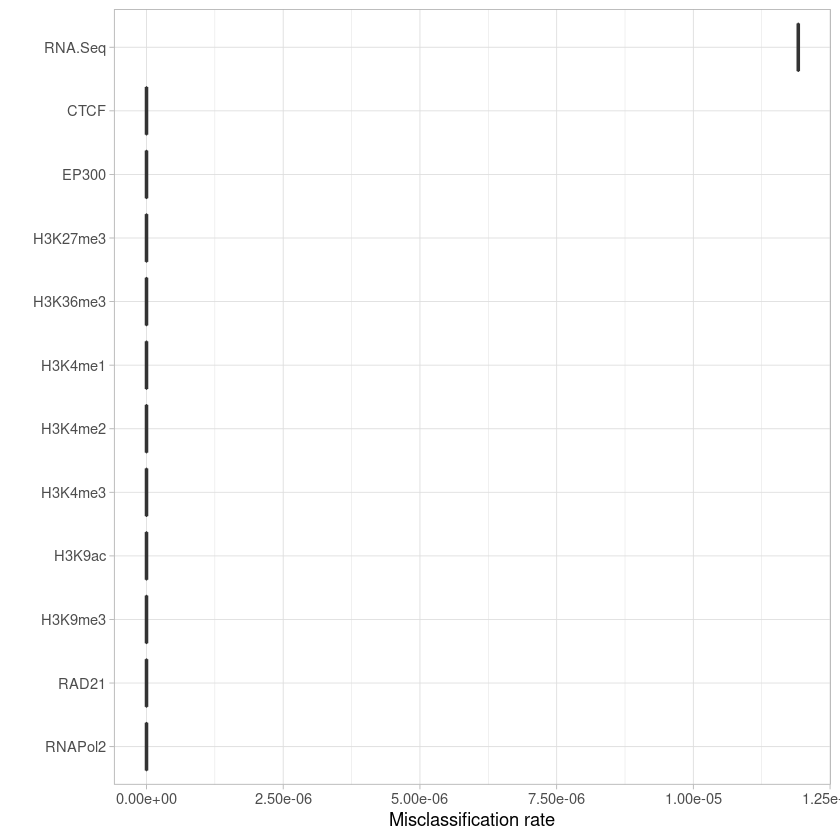

In [22]:
plot(resultFeatureImp1)

As with the logistic regression data, we find RNA.Seq enriched again.

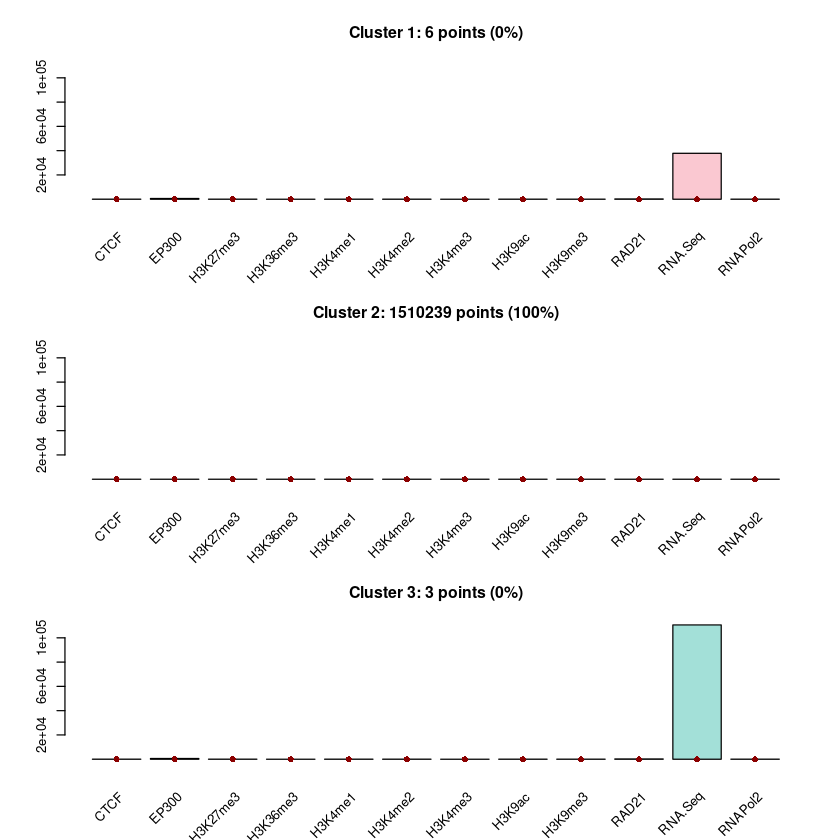

In [23]:
barplot(res1)

<p align = "justify"> Nothing is much apparent apart from the RNA.Seq expression. </p>

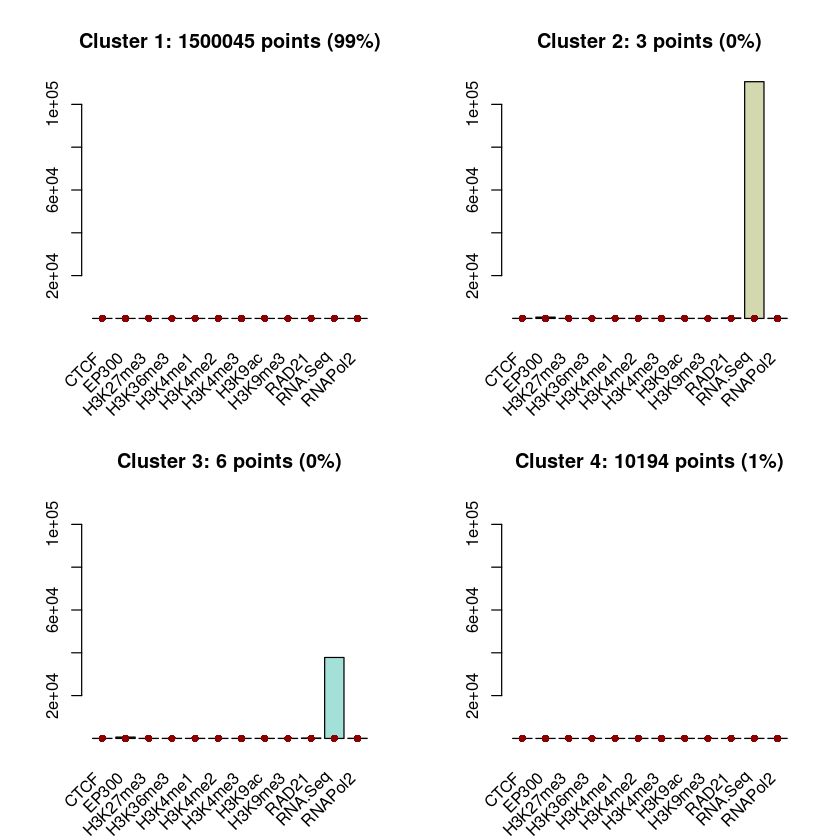

In [24]:
# --- Running Algorithm --- #
# --- 4 clusters --- #

set.seed(12)
res2 <- kcca(two[, -c(1:5, 18)], k = 4)
barplot(res2)

Clusters 2 and 3 show signs of transcriptional activation and might be considered aligned with "Hubs". Albeit, there is no apparent activity of any variable (apart from RNA.Seq).

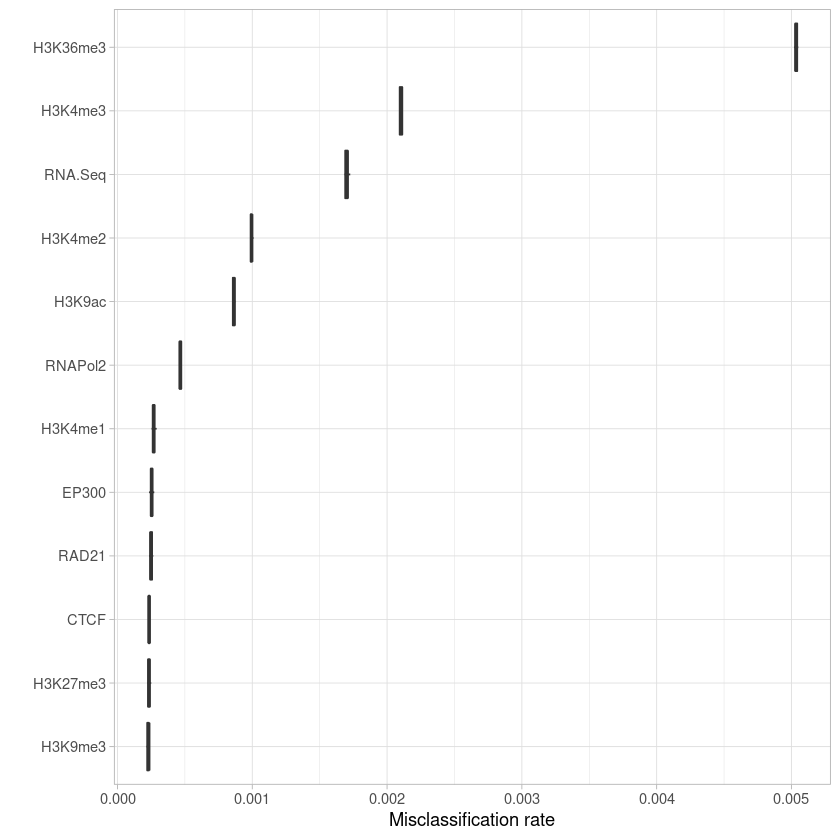

In [25]:
resultFeatureImp2 <- FeatureImpCluster(res2, as.data.table(two[, -c(1:5, 18)]))
plot(resultFeatureImp2)

<p align= "justify"> As we examine the variable importance, we see all markers for active transcription are highly enriched. Although, the expressions for these variables is not interpretable in the bar plots. These illustrations could mean that the marked variables are indispensible for precise clustering and hence effectively differntiate between "Hubs" and "Non-Hubs". </p> 

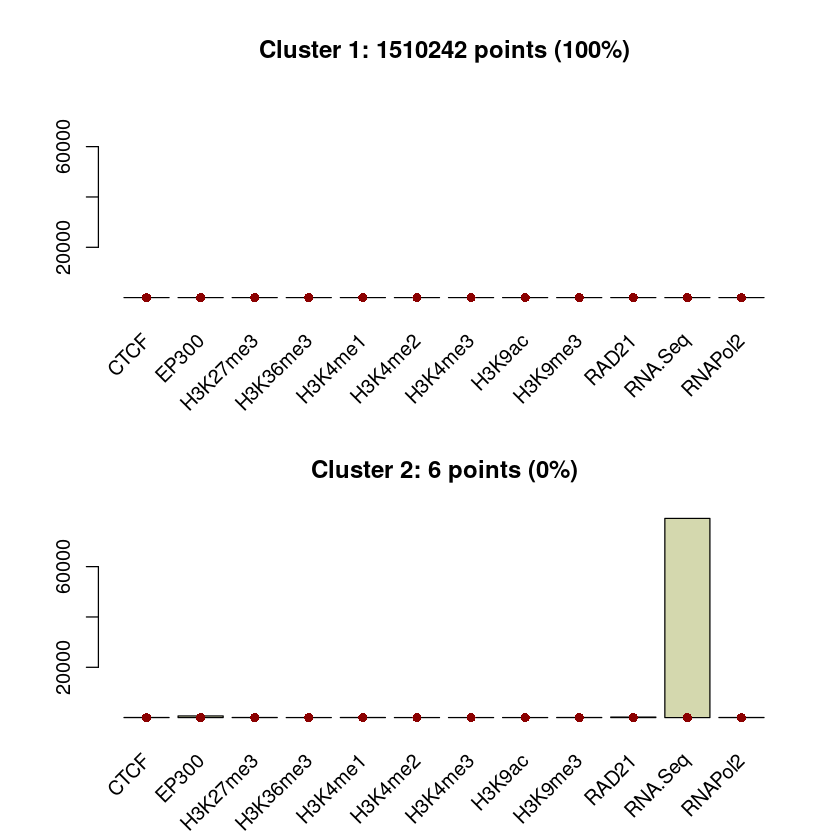

In [26]:
# --- Running Algorithm --- #
# --- 2 clusters --- #

set.seed(12)
res3 <- kcca(two[, -c(1:5, 18)], k = 2)
barplot(res3)

Even vague still.

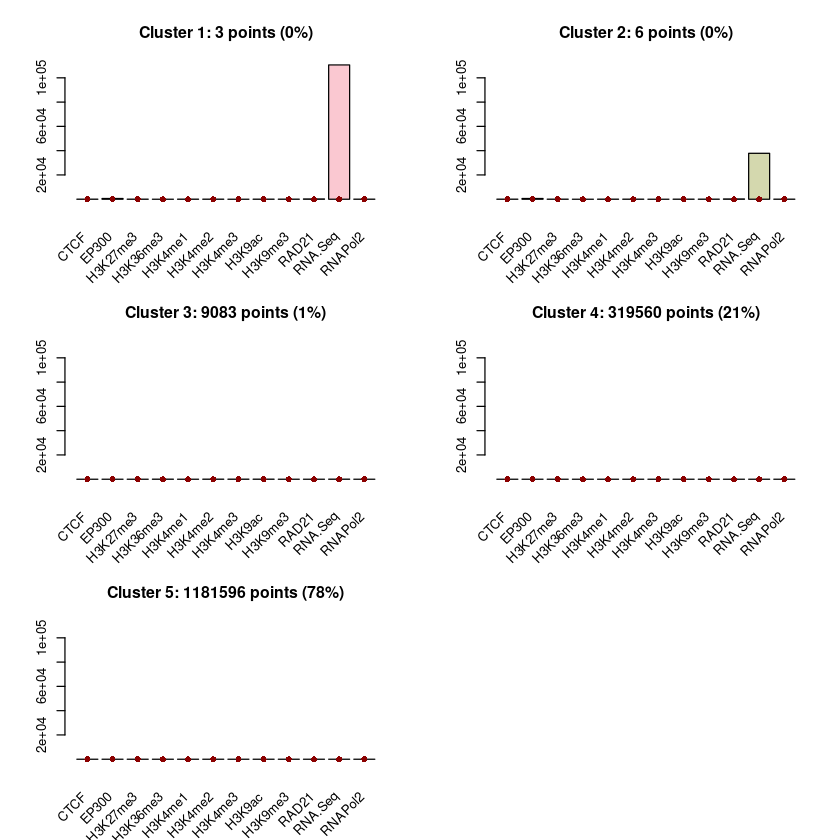

In [27]:
# --- Running Algorithm --- #
# --- 5 clusters --- #

set.seed(13)
res4 <- kcca(two[, -c(1:5, 18)], k = 5)
barplot(res4)

Nothing concrete can be deciphered from the above bar plots.

### Conclusion

<p align = "justify"> We are able to identify key variables employed for clustering. Much of them are attributed towards  transcriptional activation. There is hazy information from the bar plots though. </p> 

In [28]:
sessionInfo()

R version 3.6.0 (2019-04-26)
Platform: x86_64-redhat-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /usr/lib64/R/lib/libRblas.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    grid      stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] FeatureImpCluster_0.1.2 data.table_1.13.6       flexclust_1.4-0        
 [4] modeltools_0.2-23       lattice_0.20-41         gridExtra_2.3          
 [7] forcats_0.5.0           stringr_1.4.0           purrr_0.3.4            
[10] readr_1.4.0             tidyr_1.1.2             tibble_3.0.4           
[13